In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('student-data.csv')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [4]:
data.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

In [5]:
data['passed'].value_counts(normalize=True)

yes    0.670886
no     0.329114
Name: passed, dtype: float64

Data Processing :Converting non numerical values to numerical values.
1. Replacing yes/no with 1 and 0 
2.One hot encoding for the categorical data

In [12]:
data= data.replace(['yes','no'],[1,0])

In [9]:
data=pd.get_dummies(data)
data.head()

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,18,4,4,2,2,0,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
1,17,1,1,1,2,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
2,15,1,1,1,2,3,1,0,1,0,...,1,0,0,0,0,1,0,0,1,0
3,15,4,2,1,3,0,0,1,1,1,...,0,1,0,0,1,0,0,0,1,0
4,16,3,3,1,2,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,0


In [11]:
data.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'passed', 'school_GP', 'school_MS', 'sex_F',
       'sex_M', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3',
       'Pstatus_A', 'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_father',
       'guardian_mother', 'guardian_other'],
      dtype='object')

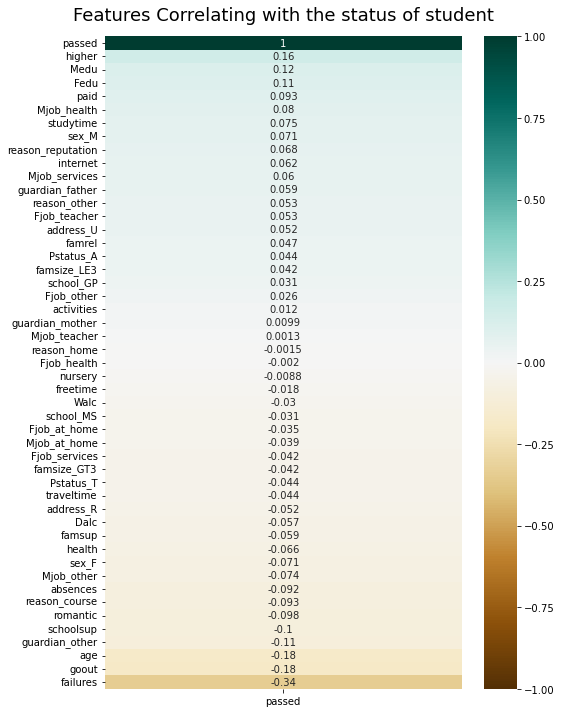

In [10]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(data.corr()[['passed']].sort_values(by='passed', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with the status of student', fontdict={'fontsize':18}, pad=16);

From the correlation heatmap we can see mother and father education and the students who wants to take higher education are having high postive impact on student performance. Failures and Going out features are having high negative impacton students performance.By evaluating this we can see the factors that affect the students to pass the exam.

# Model Implementation

1.Logistic Regression

In [31]:
y= data['passed']
X= data.drop(['passed'],axis=1)

In [110]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [111]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size = 0.2)

In [112]:
from sklearn.linear_model import LogisticRegression
log_reg= LogisticRegression()


In [113]:
log_reg.fit(X_train,y_train)


LogisticRegression()

In [114]:
y_pred=log_reg.predict(X_test)

In [115]:
from sklearn.metrics import f1_score,accuracy_score,precision_score,confusion_matrix

In [116]:
print('Accuracy score:',accuracy_score(y_pred,y_test))
print('f1 score is:',f1_score(y_pred,y_test))

Accuracy score: 0.7468354430379747
f1 score is: 0.8245614035087719


2.kNN

In [117]:
from sklearn.neighbors import KNeighborsClassifier

In [118]:
knn_ = KNeighborsClassifier()

In [119]:
knn_.fit(X_train,y_train)

KNeighborsClassifier()

In [120]:
y_pred_knn= knn_.predict(X_test)

In [121]:
print('accuracy score:',accuracy_score(y_pred_knn,y_test))
print('f1 score is:',f1_score(y_pred_knn,y_test))

accuracy score: 0.6835443037974683
f1 score is: 0.7899159663865547


3.Decision Tree 

In [122]:
from sklearn.tree import DecisionTreeClassifier

In [123]:
dt= DecisionTreeClassifier()

In [124]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [125]:
dt_pred= dt.predict(X_test)

In [126]:
print('accuracy score:',accuracy_score(dt_pred,y_test))
print('f1 score is:',f1_score(dt_pred,y_test))

accuracy score: 0.6455696202531646
f1 score is: 0.7454545454545455


4.SVM

In [127]:
from sklearn.svm import SVC

In [128]:
svm_linear=SVC(kernel='linear')

In [129]:
svm_linear.fit(X_train,y_train)


SVC(kernel='linear')

In [131]:
y_pred=svm_linear.predict(X_test)
print('Accuracy is',accuracy_score(y_test,y_pred))

Accuracy is 0.6962025316455697


5.Random Forest

In [132]:
from sklearn.ensemble import RandomForestClassifier

In [133]:
rf_model = RandomForestClassifier(random_state=42)

In [134]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [135]:
y_pred=rf_model.predict(X_test)
print('Accuracy is',accuracy_score(y_test,y_pred))
confusion_matrix(y_test,y_pred)

Accuracy is 0.6962025316455697


array([[ 6, 21],
       [ 3, 49]], dtype=int64)

By implenting these prediction models Logistic regeression method gives an accuracy of approximately 75%.